In [1]:


import networkx as nx
import pandas
from tqdm import trange, tqdm
import clustering
import graph_generator
import numpy as np
import random
from matplotlib import pyplot as plt


In [26]:
G = graph_generator.get_graph('R6564910')
Q = nx.Graph()
for u, d in G.nodes(data=True):
    Q.add_node(u, x=d['x'], y=d['y'])
for u, v, d in G.edges(data=True):
    if u != v:
        Q.add_edge(u, v, length=d['length'])
del G
G = Q


In [40]:


def resolve(G:nx.Graph, k :int, max_iter:int = 1, draw:bool = True) -> list[set[int]]:
    nodes = G.nodes()
    sample = random.sample(nodes, k)
    need_update = True
    iter = 0
    center_to_nodes = {}
    while iter< max_iter and len(center_to_nodes) < k:
        
        pass
    res = []
    for u in center_to_nodes:
        res.append(set(center_to_nodes[u]))
    return res

In [44]:
G.nodes()[5563345998]

{'x': 60.5928332, 'y': 56.8015486, 'cluster': 7}

/tmp/ipykernel_25856/2346808485.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample = random.sample(nodes, k)
find new center 1: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


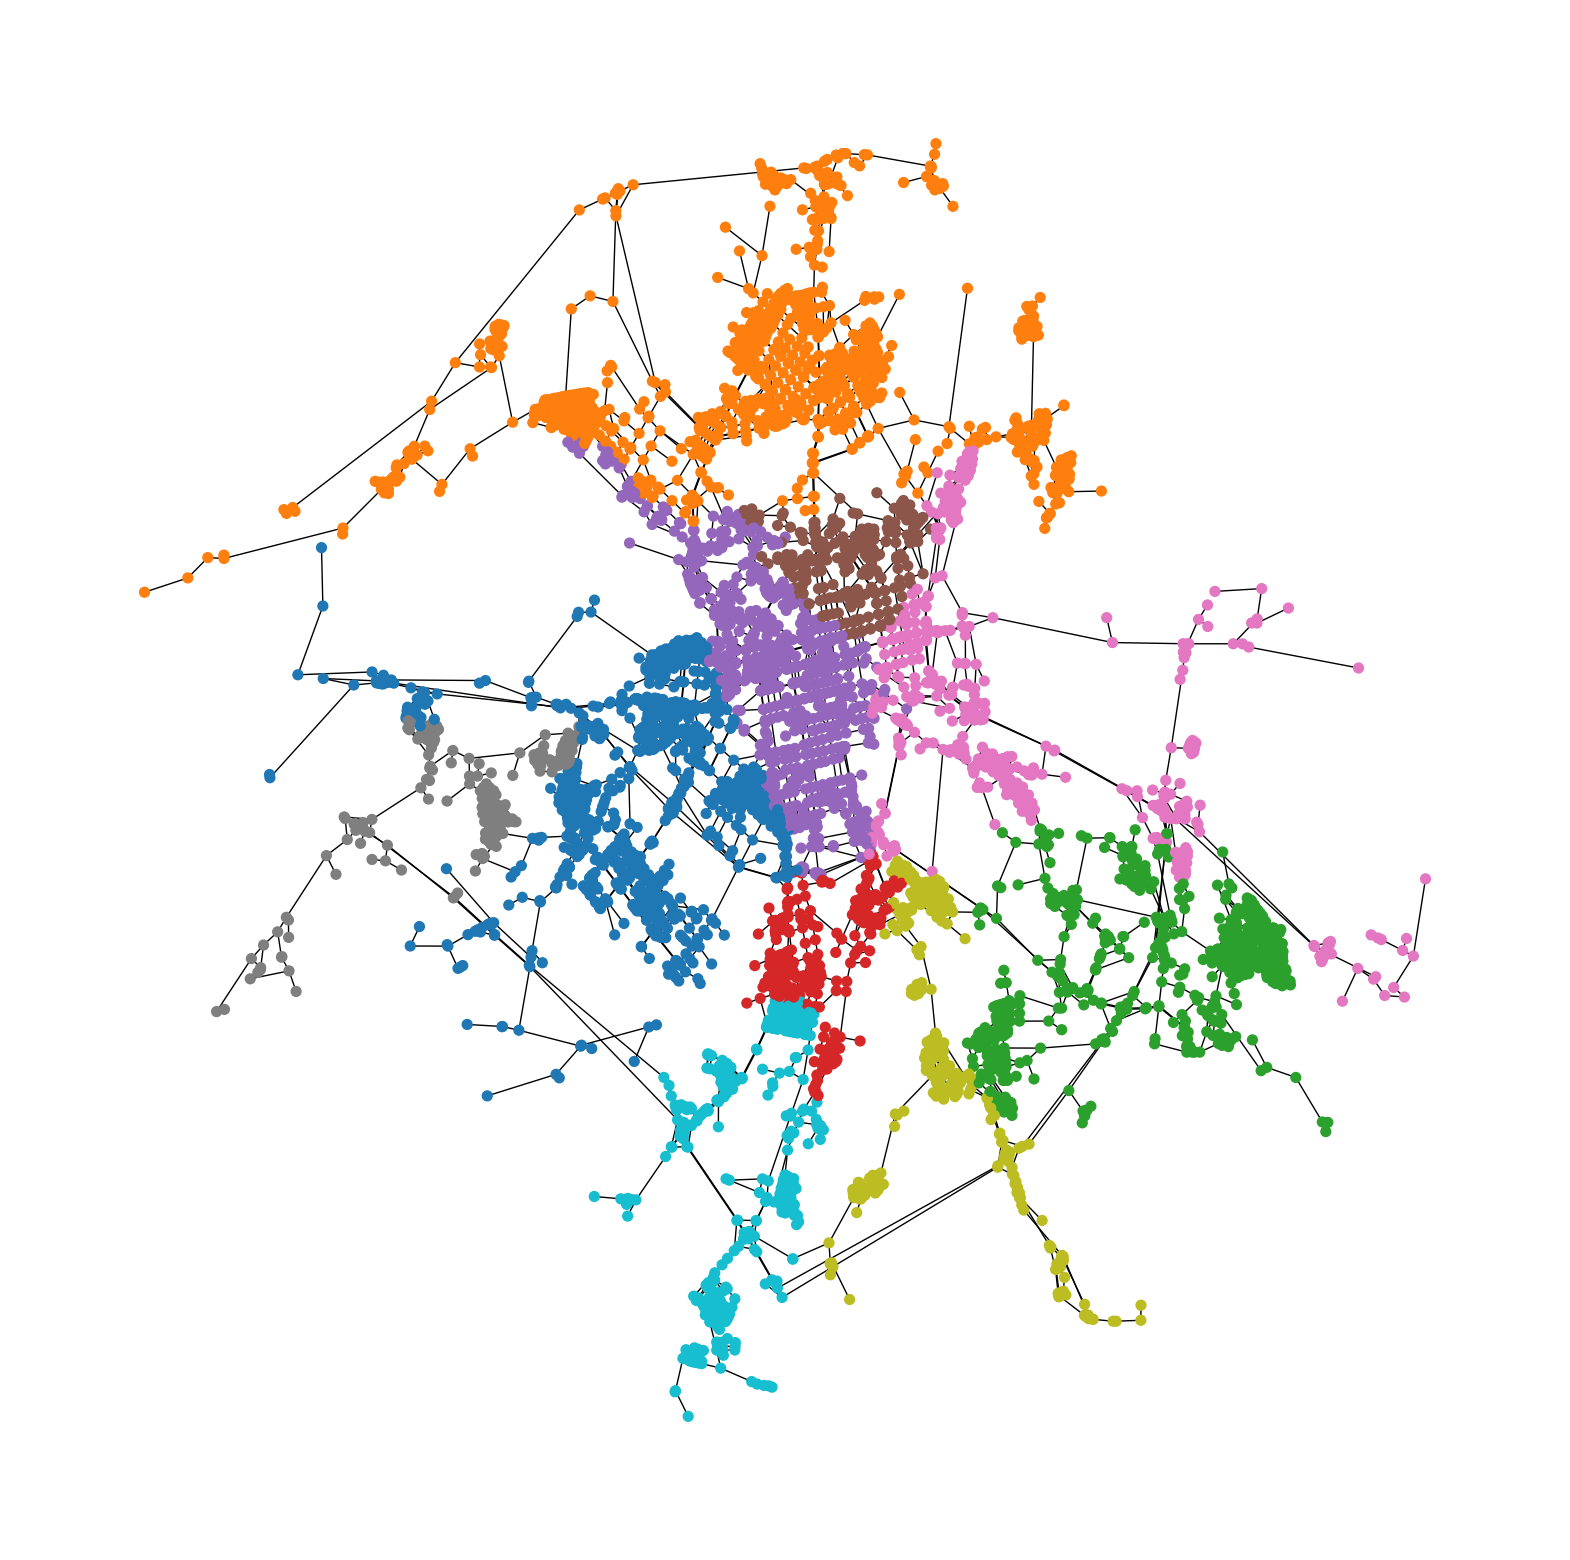

find new center 2: 100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


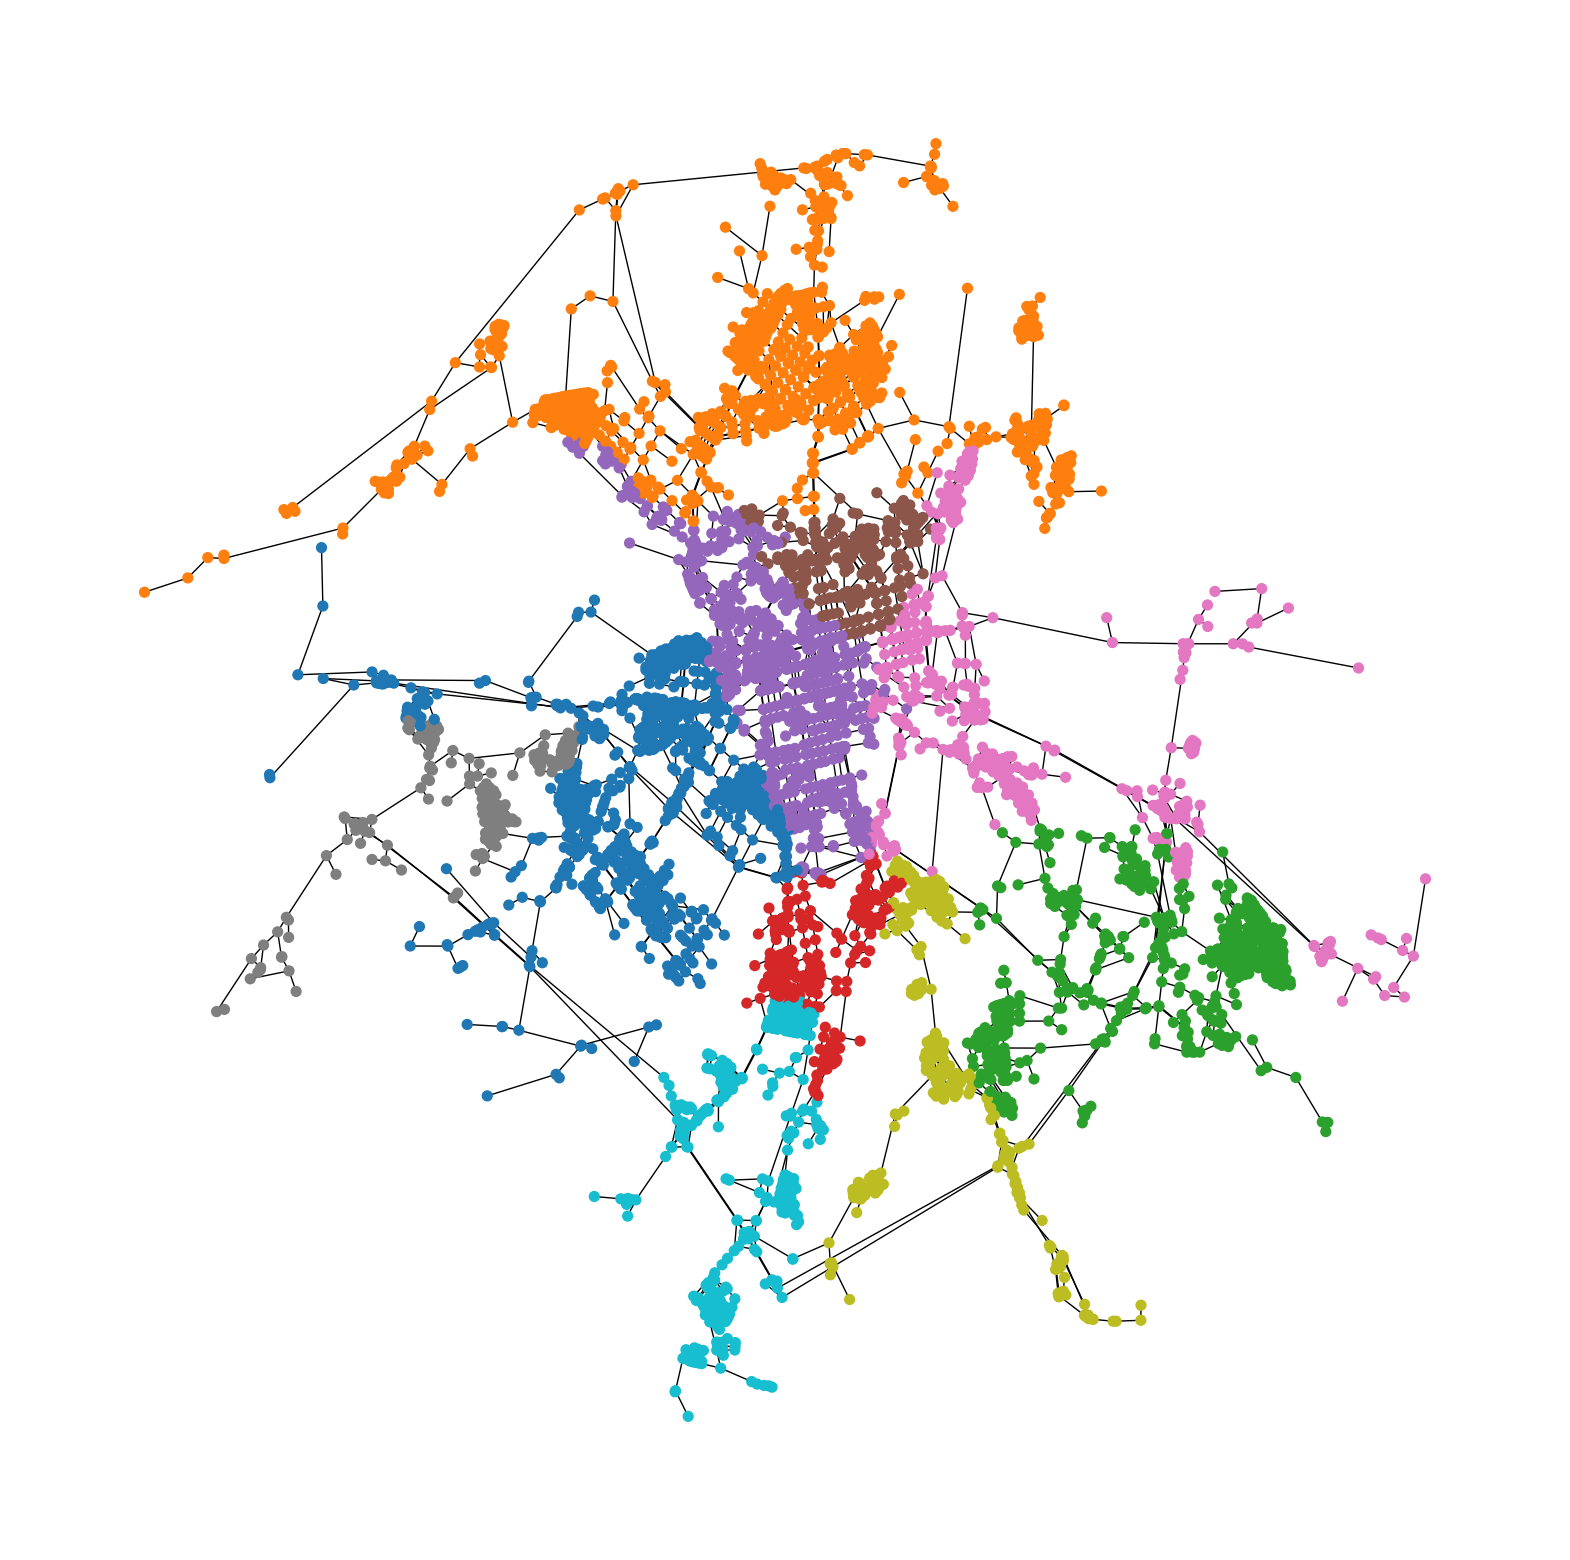

find new center 3: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


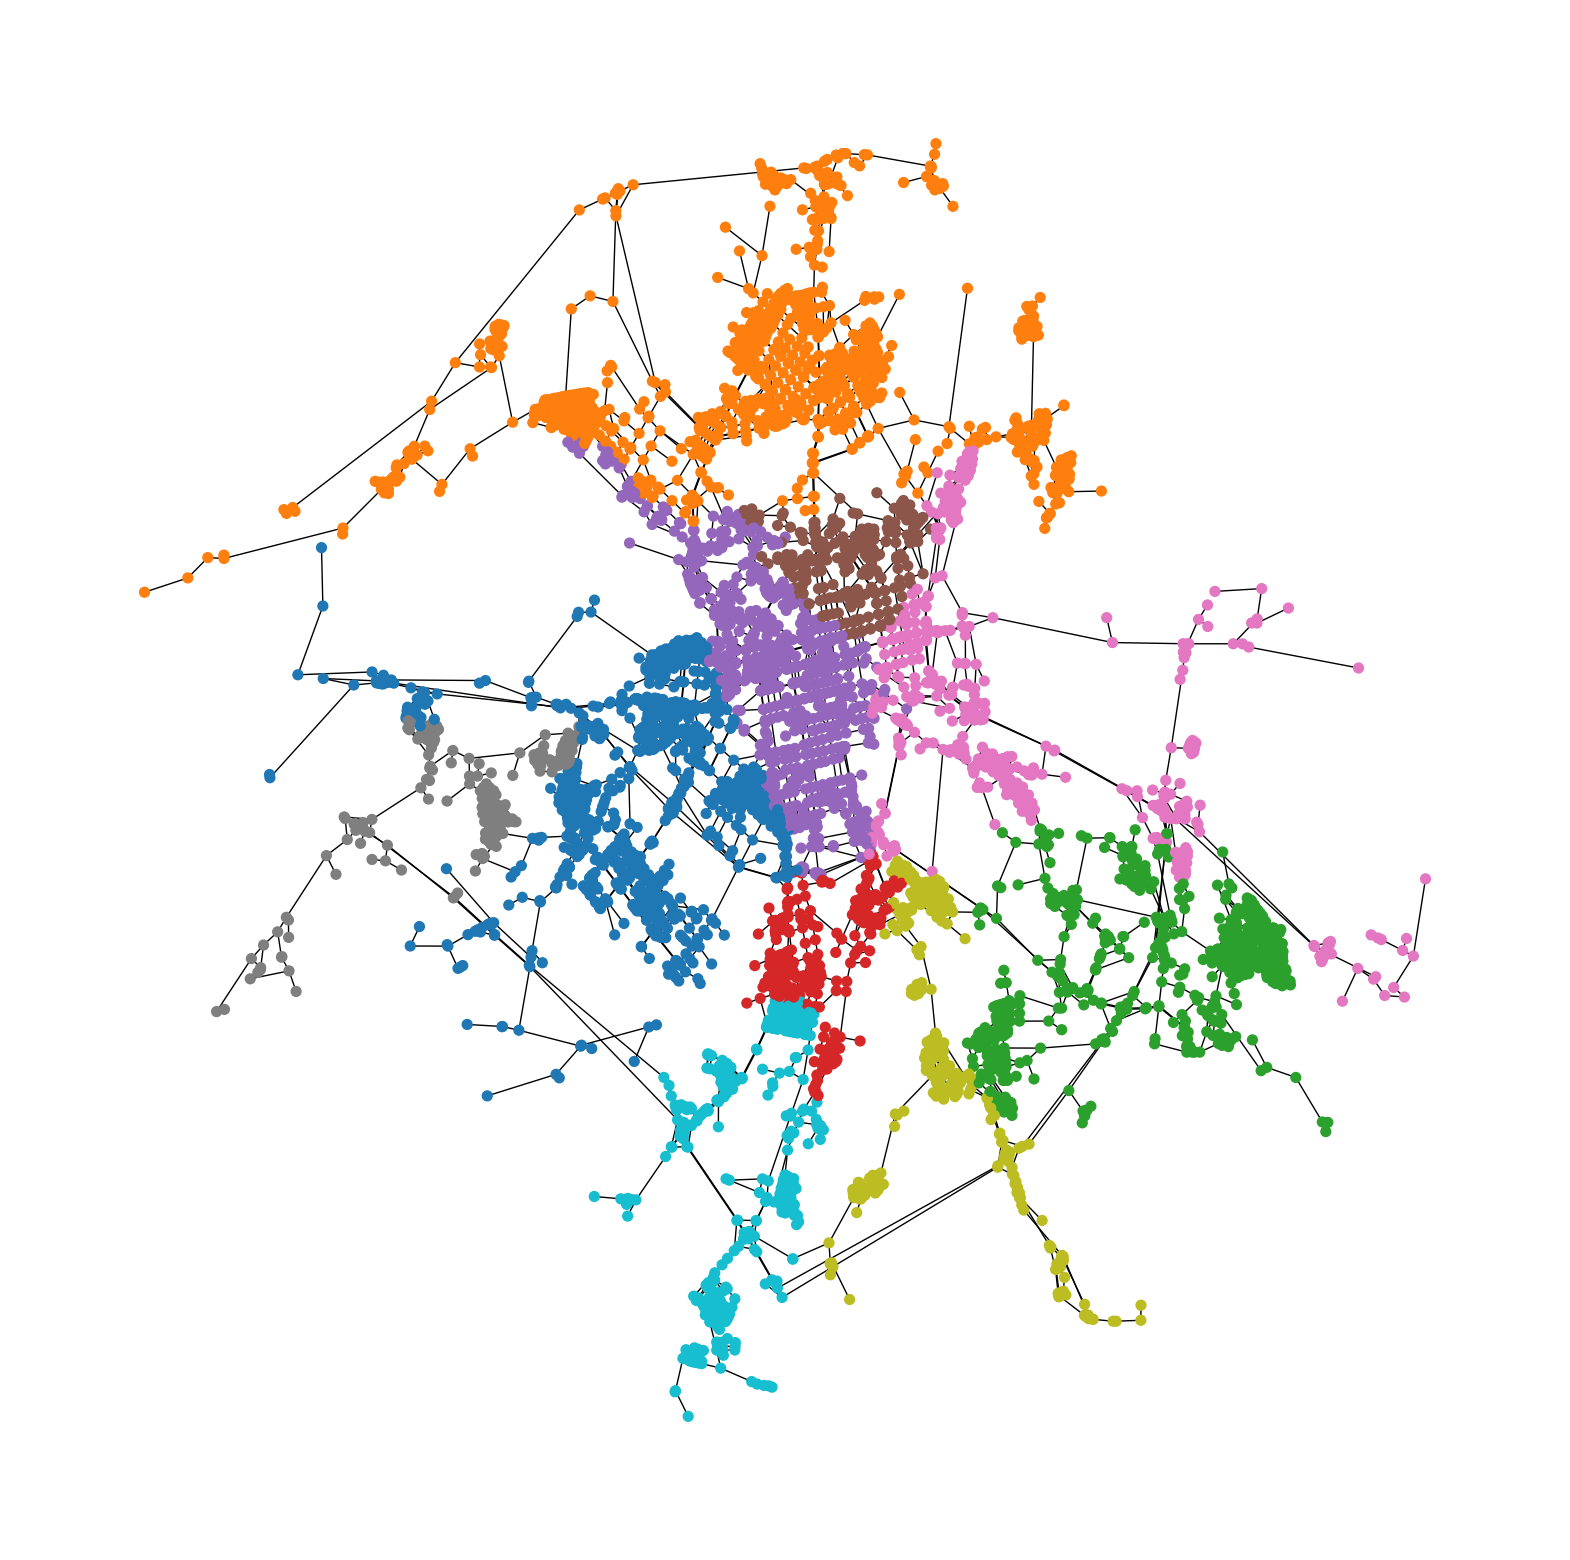

find new center 4: 100%|██████████| 10/10 [00:14<00:00,  1.42s/it]


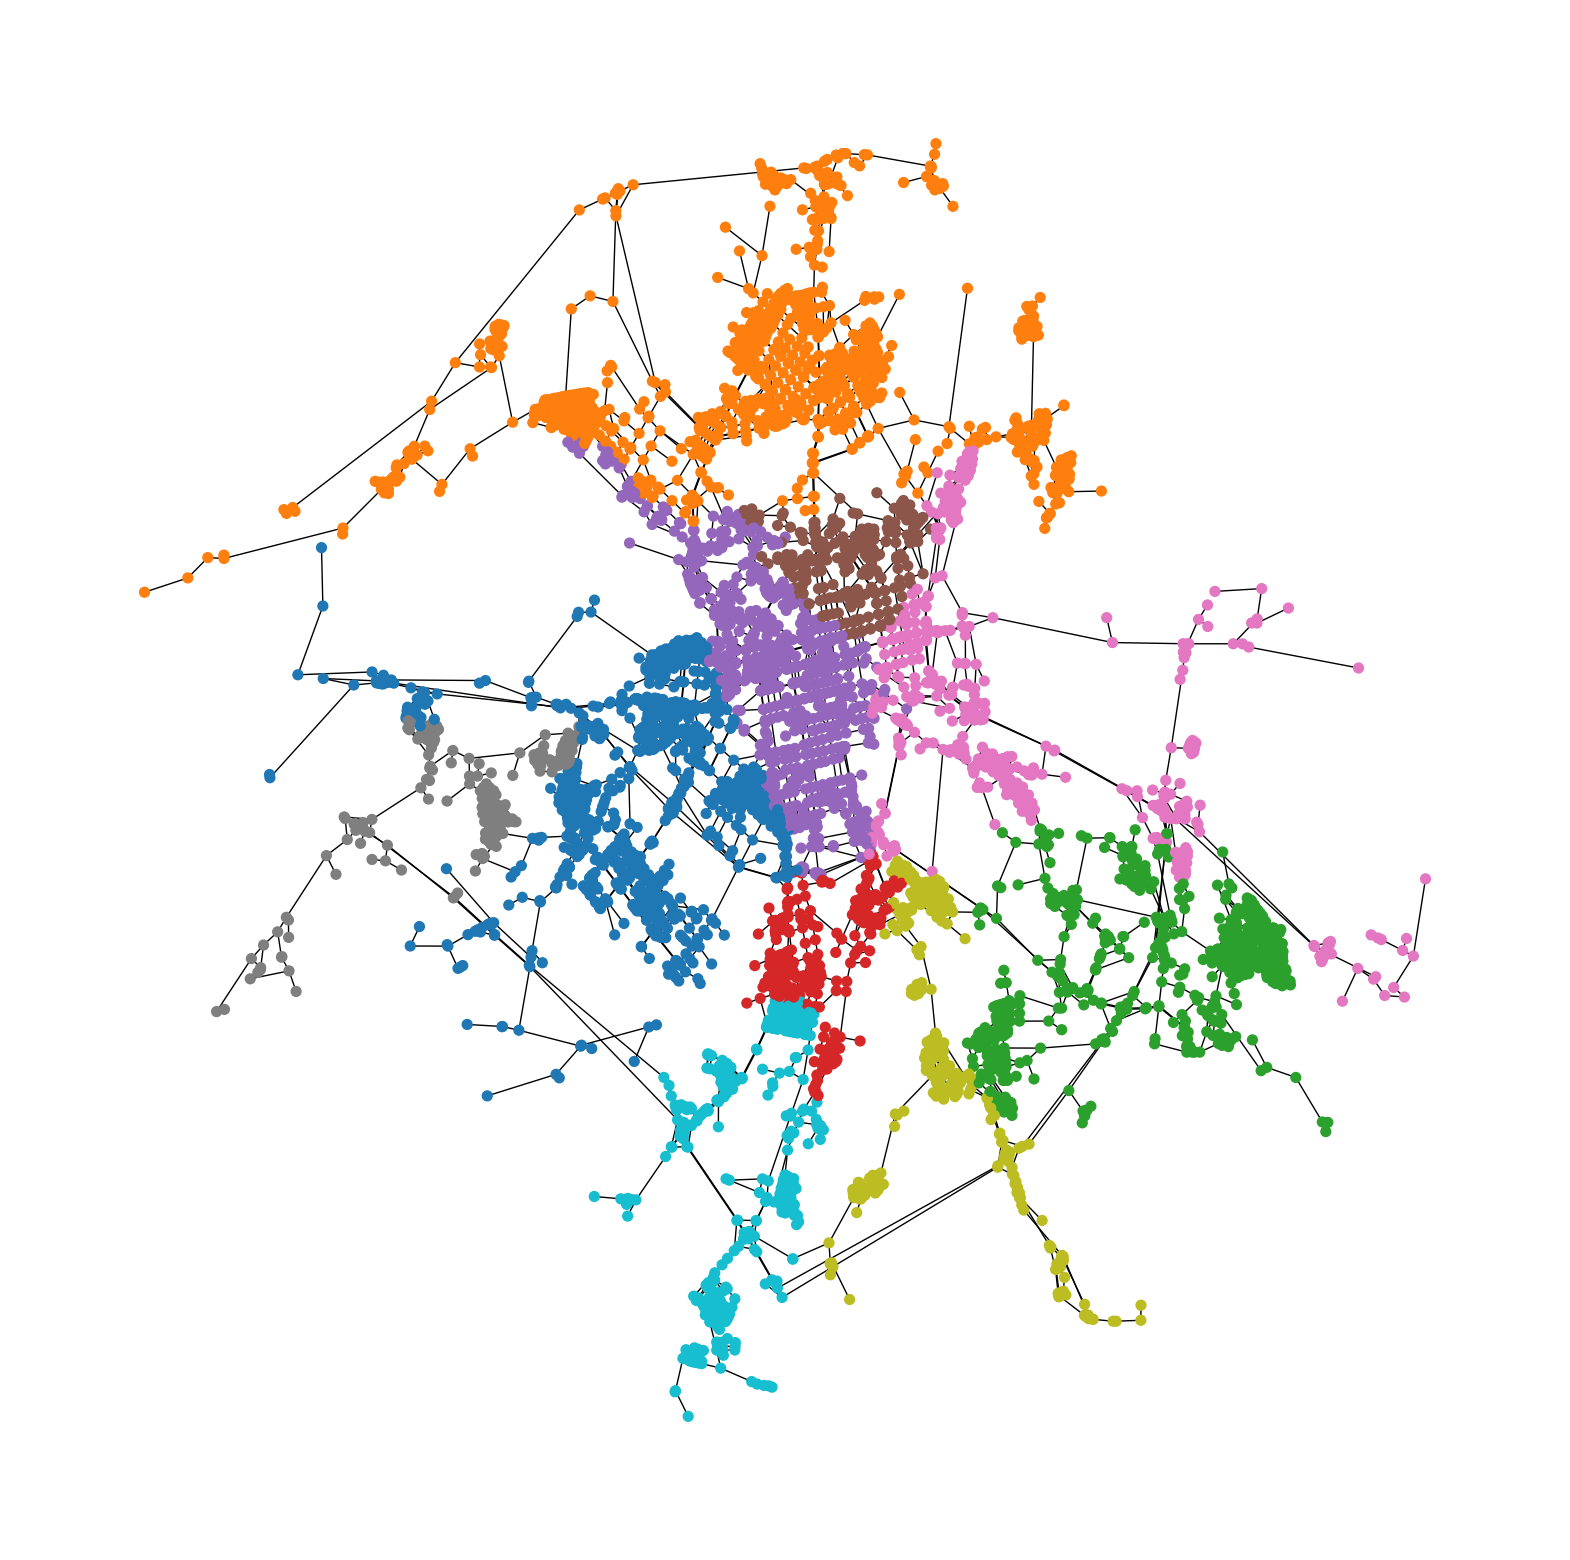

find new center 5: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


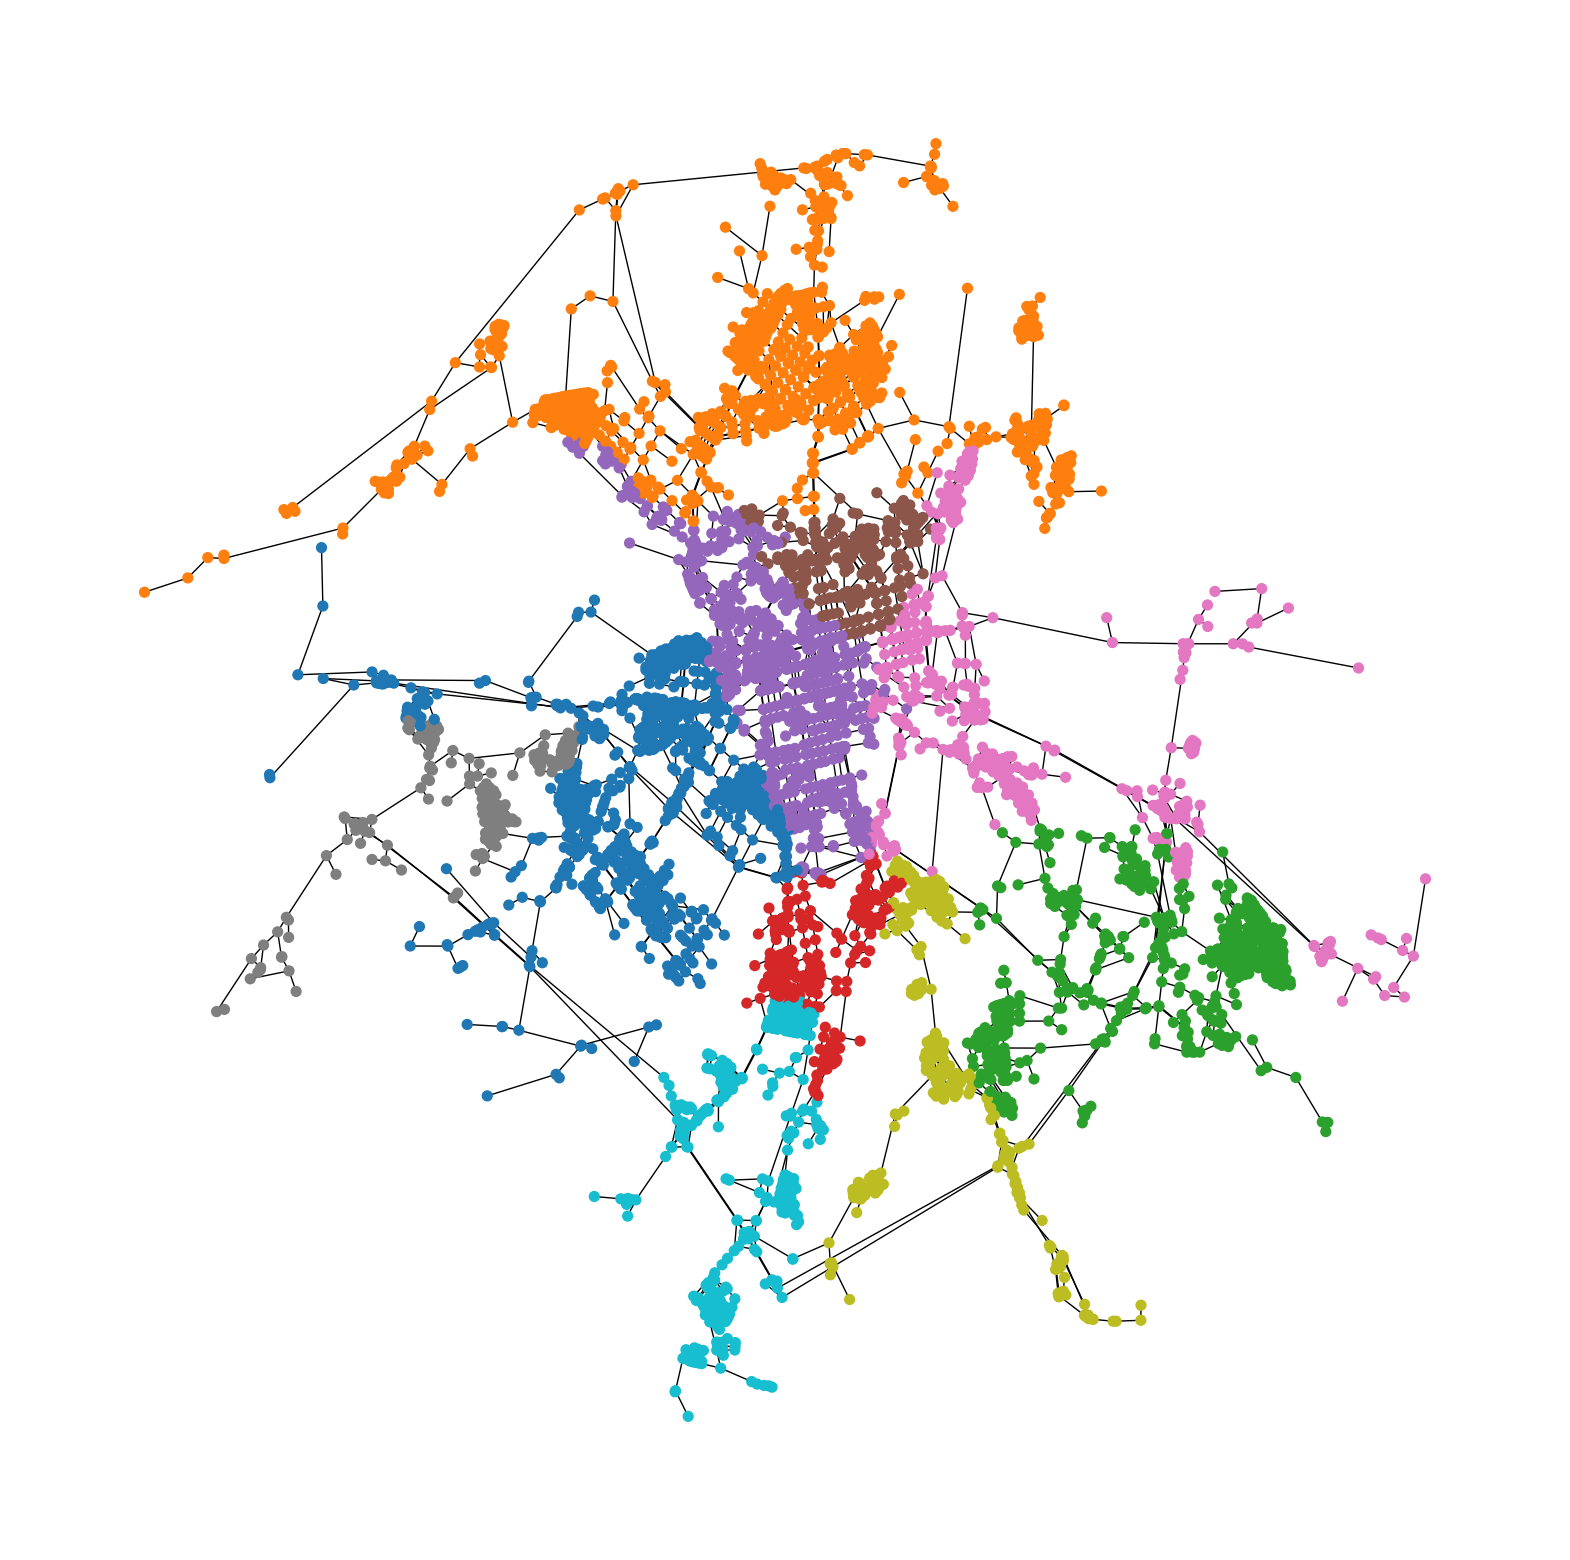

In [41]:
communities = resolve(G, 10, max_iter=10)
clustering.CommunitiesResolver.write_communities(G, communities)

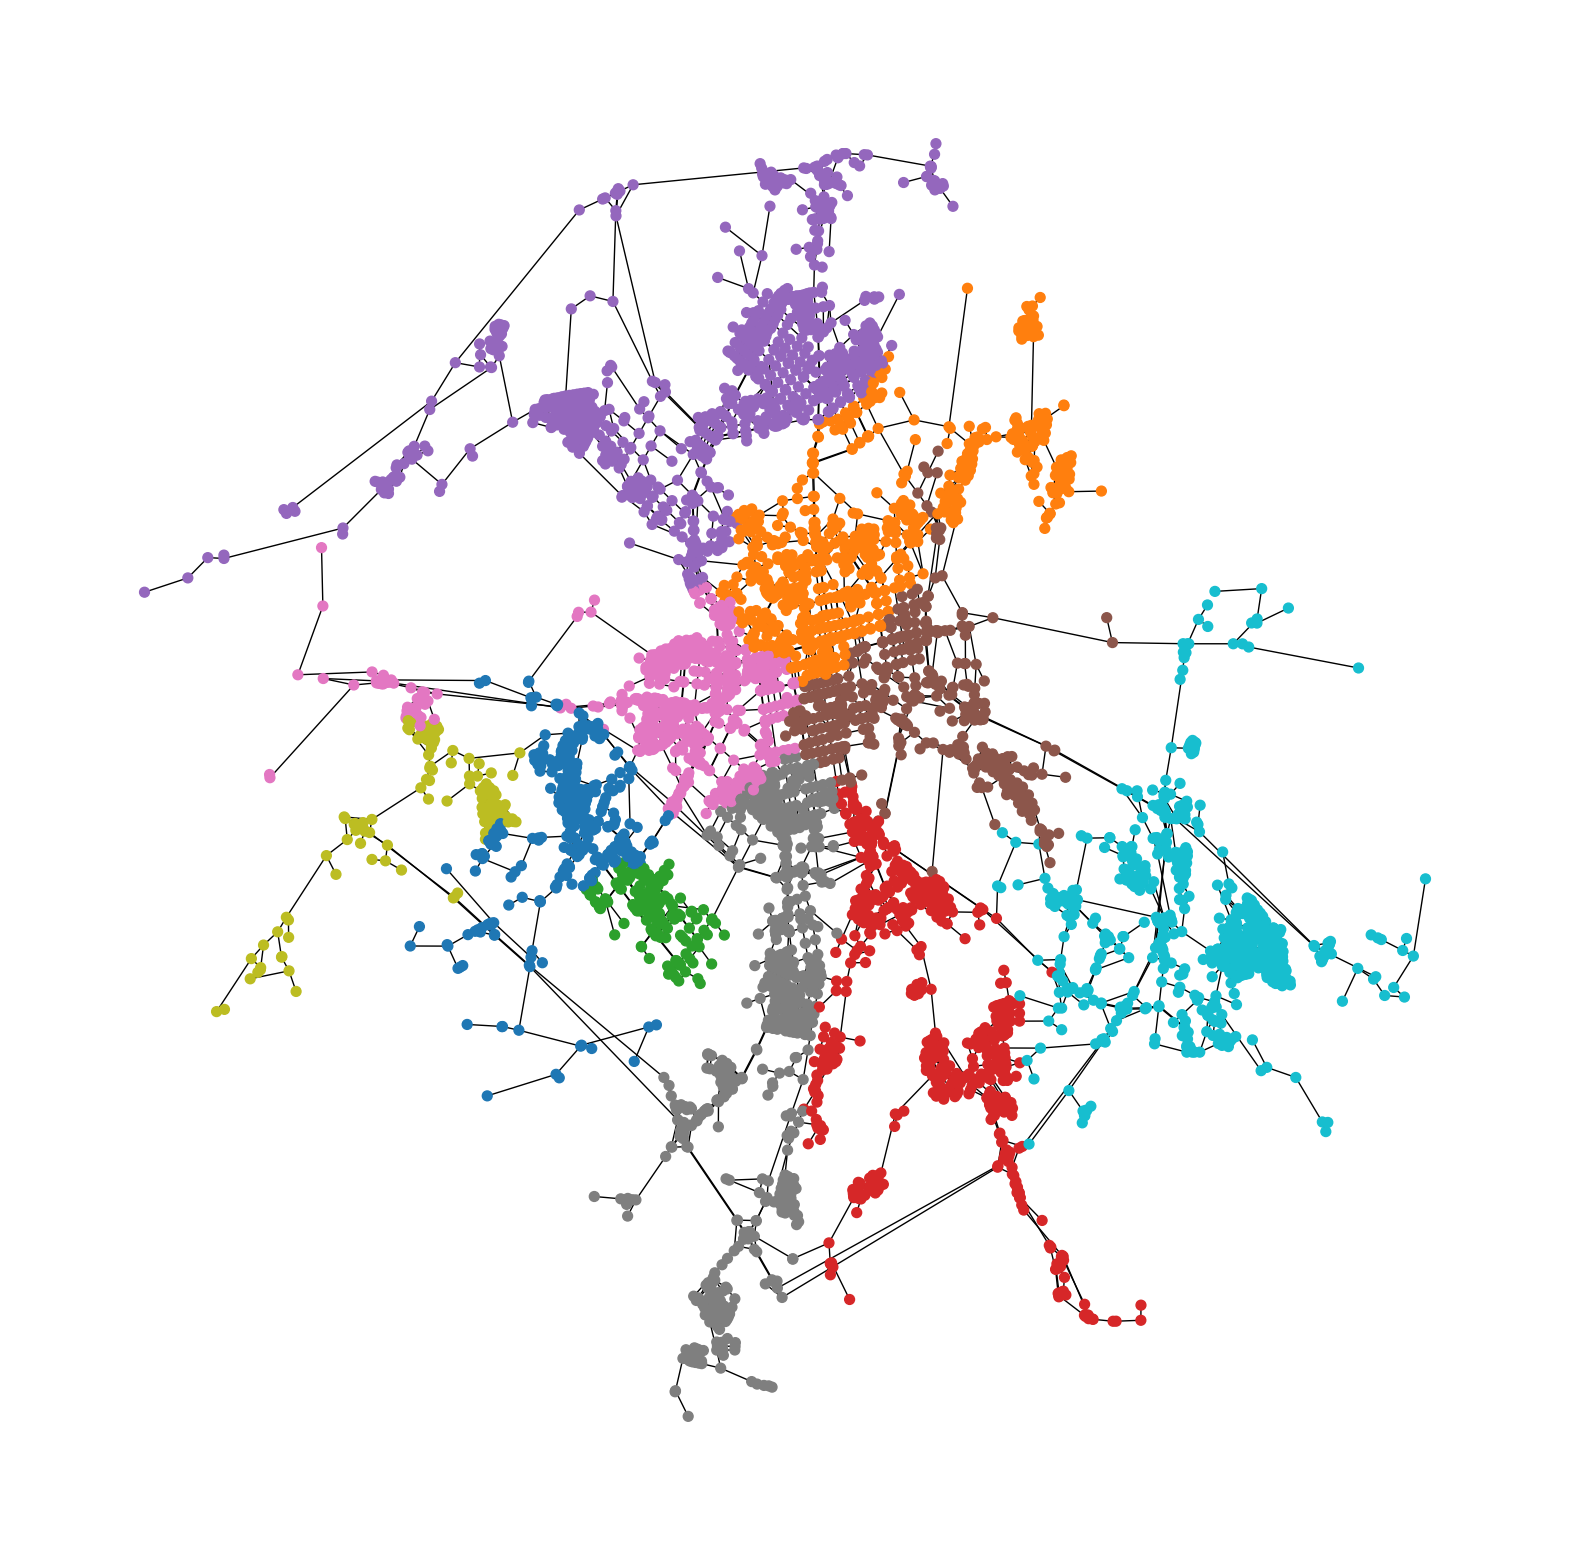

In [33]:

pos_G = {u: (d['x'], d['y']) for u, d in G.nodes(data=True)}
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(20)
fig.set_figheight(20)
cmap = plt.get_cmap('tab10')
colors = [cmap(d['cluster']/len(communities)) for u,d in G.nodes(data=True)]
nx.draw(G, ax=axs, node_size = 50, pos=pos_G, node_color = colors)